# Exercise 2: Numpy and linear regression with basic models

**Name**: Danil Gutak

**Student number**: 12215165

**Semester**: WS23

For this exercise we will need pandas and pyplot (matplotlib). Let's import them right away.

In [47]:
import pandas as pd
from matplotlib import pyplot as plt

## Working with numpy

Numpy (https://numpy.org/) is one of the most powerful and popular Python packages for statistical analysis and performing numerical computations in general.

### Numpy arrays

The fundamental object in numpy is an "array". Generally, numpy arrays are collections of objects of the same type. Each array has a certain dimension. For instance, with a dimension of 1 and a float type (e.g., `np.float64`) the array is equivalent to a vector, $v \in \mathbb{R}^d$. With dimension 2, an array represents a matrix,  $A \in \mathbb{R}^{(n\times m)}$. A two-dimensional numpy array is also very similar to a pandas DataFrame. In most cases, arrays will have numerical type and either one or two dimensions. However, in general you can also create a numpy array that stores text and they may have any arbitrary number of dimensions. 

An array also has a `shape`, which defines how many objects/numbers it can store along which dimension. E.g., an array of shape `(2, 4)` is analogous to a table/dataframe with 2 rows (1st dimension) and 4 columns (2nd dimension), thus, it can store a total of $2\cdot 4 = 8$ objects, which is it´s `size`. 

To use numpy we first need to import it (this is done as `np` by convention). 

In [48]:
import numpy as np

Have a quick look at the user guide at https://numpy.org/devdocs/user/basics.creation.html and create a simple two-dimensional array (= `np.ndarray` class) using the [`np.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) function and assign it to a variable (e.g., `myarray = np.array(...)`). Put in any numbers you like. Note that you do not have to specify a `dtype` (by default, numpy will choose a reasonable data type based on your input). 

In [49]:
myarray = np.array([[1, 2,3],[3,2,1]]) # TODO
myarray

array([[1, 2, 3],
       [3, 2, 1]])

Now check the data type, the shape and the size of your array by printing the `.dtype`, `.shape` and `.size` on your variable. Use python's `print()` function to output all attributes in one code cell. 

In [50]:
print("type:",myarray.dtype,"\nshape:",myarray.shape,"\nsize:",myarray.size)

type: int64 
shape: (2, 3) 
size: 6


Often it is important to make sure that a newly created array uses floating point numbers as datatype. To ensure that, it is useful to give at least one of the numbers in the lists for creation as floating point numbers.

Compare the data type and actual entries of two arrays, one created from the list `[1, 2, 3]`, the other created from the list `[1.0, 2, 3]`. Interpret the result.

In [51]:
a1 = np.array([1, 2, 3])
a2 = np.array([1.0, 2, 3])
print(a1)
print(a2)
print(a1.dtype)
print(a2.dtype)
print("Same data type? -",a1.dtype == a2.dtype)
print("Same entries? -",a1 == a2)

[1 2 3]
[1. 2. 3.]
int64
float64
Same data type? - False
Same entries? - [ True  True  True]


**Interpretation**: Well, it appears that even though the data types are different the values are comparible as 1 == 1.0, however it appears if we compare 1.1 and 1 it is false meaning that python cast values to floats rather than to ints to compare.

Just like on Pandas' DataFrame, we can use positional indexing to access certain objects within a numpy ndarray. E.g., `myarray[i, j]` (or `myarray[i][j]`) will return the number stored at the i-th row and j-th column. To get a subset of a row/column use the ":"-notation, e.g., `myarray[::2, 2:5]` to get every second number from the 3rd to 5th column. 
The User Guide (https://numpy.org/doc/stable/user/basics.indexing.html) provides more information on indexing numpy arrays. 

You can use almost any mathematical operation on numerical arrays you can think of, as long as their shapes are compatible. Just a few examples: 

- Add a scalar constant to every number in an array: `a + 1` or `np.add(a, 1)`
- Add up numbers from two arrays of identical shape: `a + b` or `np.add(a, b)`
- Multiply numbers from two arrays element-wise (hadamard product): `a * b` or `np.multiply(a, b)`
- Dot product between two arrays (matrix multiplication): `a @ b` or `np.dot(a, b)` or `a.dot(b)`
- Transpose an array: `a.transpose()` or `a.T`
- Natural logarithm of every element: `np.log(a)`
- Maximum/Minimum value in an array: `np.max(a)/np.min(a)`

### Vectors and matrices in numpy

Before we dive into regression models, let's take a look at how we can use numpy to perform some of the mathematical operations we frequently need when working with vectors and matrices.

The only difference between a vector and a matrix in numpy is their dimension. While a vector is a one-dimensional array, a matrix is two-dimensional. Numpy's functions and methods are designed such that they work with arrays, independent of their dimension. Hence, we can use the same function/method for vectors and matrices, e.g., `np.dot` to multiply two vectors, a vector and matrix or two matrices. Most operations can also be abstracted to arrays of higher dimensions. 

*Note: numpy implements also some functions/methods that are specific to operations on arrays with certain dimensions (e.g., product between matrices: `np.matmul`, or dot product between vectors: `np.vdot`). However, these also work with arrays of other dimensions. Their main difference lies mostly in how they deal with arrays of higher dimensions. As long as you work with dimensions $\leq 2$ (i.e., with scalars, vectors and matrices), we recommed that you stick to the more universal function, i.e., `np.dot`.*

There are three important operations that you will come across 

- **Addition/Substraction**: [`np.add`](https://numpy.org/doc/stable/reference/generated/numpy.add.html)/[`np.substract`](https://numpy.org/doc/stable/reference/generated/numpy.subtract.html). These functions and operators allow you to add/substract a scalar to/from all entries in a vector/matrix (e.g., $\lambda + \textbf{M}$), add/substract two vectors (e.g., $\textbf{v} + \textbf{w}$), add/substract two matrices (e.g., $\textbf{M} + \textbf{N}$), and even add/substract a vector from a matrix multiple times. You can also use the `+`/`-` operators to get the same results, so `myarray1 + myarray2` is the same as `np.add(myarray1, myarray2)`. However, addition/substraction only works if the involved vectors/matrices have compatible shapes $-$ there is no reasonable way to add a vector with 3 entries to a 2-by-2 matrix.
- **Multiplication**: [`np.dot`](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) and [`ndarray.dot`](https://numpy.org/doc/1.21/reference/generated/numpy.ndarray.dot.html). This function and method, depending on the arrays you input, will give you the scalar-vector/matrix product (e.g., $\lambda \cdot \textbf{v}$ or $\lambda \cdot \textbf{M}$), vector scalar/inner product (e.g., $\textbf{v} \cdot \textbf{w}$), matrix product (e.g., $\textbf{M} \cdot \textbf{N}$) or the vector-matrix product (e.g., $\textbf{M} \cdot \textbf{v}$).
- **Transposition**: For transposing a matrix you can either use the function [`np.transpose`](https://numpy.org/doc/stable/reference/generated/numpy.transpose.html), the method [`ndarray.transpose`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.transpose.html#numpy.ndarray.transpose), or the attribute [`ndarray.T`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.T.html).
- **Inversion**: For a square matrix that has an inverse you can use the function [`np.linalg.inv`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) to compute it's inverse matrix. Note: an $n$-by-$n$ matrix $\textbf{A}$ is *invertible* if there exists a matrix $\textbf{A}^{-1}$ such that $\textbf{A}\textbf{A}^{-1} = \textbf{A}^{-1}\textbf{A} = \textbf{I}_n$ (here, $\textbf{I}_n$ is the $n$-by-$n$ identity matrix, which has ones along its diagonal and zero-entries elsewhere). Otherwise, you can use [`np.linalg.pinv`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html) to compute the *Moore-Penrose inverse* (the "pseudoinverse"), which essentially approximates the inverse for any non-invertible (= singular) matrix. In case of an invertible matrix, the Moore-Penrose inverse is the same as the inverse, so you can still use `np.linalg.pinv`. 

*Note: there is no such thing as a true division for vectors/matrices. What comes closest to a division in the sense that it can reverse a vector-matrix multiplication (e.g., $\textbf{A} \textbf{v}$, for an invertible matrix), is to multiply the result by the inverse matrix. This will reverse the linear transformation of the vector by the matrix (e.g., $\textbf{A}^{-1} \textbf{A} \textbf{v} = \textbf{I}_n\textbf{v} = \textbf{v}$)*. 

**Tasks:** 
1. Construct a 3-by-2 matrix, i.e., a 2D numpy array with a shape of `(3,2)` using `np.array`.
2. Also construct a vector of size 2, i.e., a numpy array with a shape of `(2,)`.
3. Compute the dot product between the matrix and the vector using the `.dot` method.
4. Print the second column of the matrix using an index expression like `[:,1]`.
5. Compute the dot product between the third row of the matrix and the vector and compare to the result in step 3
6. Explain the error message that you get when trying to compute the dot product between the second column of the matrix and the vector.

In [52]:
matrix = np.array([[ 2,3],[2,1], [2,3]]) # 1
myarray2 = np.array([1,2]) # 2
print(matrix.dot(myarray2)) # 3
print(matrix[:,1]) #4
print(matrix[2,:].dot(myarray2)) # 5
matrix[:,1].dot(myarray2) # 6




[8 4 8]
[3 1 3]
8


ValueError: shapes (3,) and (2,) not aligned: 3 (dim 0) != 2 (dim 0)

**Explanation**: So basically error says that they are of different size(2 and 3 ) and for dot product we need similar sizes.

## Linear regression with basic models in numpy

Now that we know how to work with vectors and matrices in numpy, we can continue to analyze our timeseries data set. Import your data set just like in exercise 1 with pandas' `read_csv` function into a dataframe. However, this time use the CSV you created with `DataFrame.to_csv` just before the plotting part of exercise 1! Alternatively, you can also import your original CSV.

Before you continue, please check the following points:
- Make sure that the row index is set to the time, use the `index_col` parameter of `read_csv` for that 
- If your row index is in the format of a date, use `parse_dates=True` to convert them back to a DatetimeIndex. Use also `dayfirst=True` if you chose a `date_format` where the day appears first, e.g., `"%d.%m.%Y"`. 
- Your time index must be either of a numeric type (e.g., `float` or `int`) or a `datetime`, check this with `DataFrame.index.dtype`. 
- Make sure that your columns are labeled correctly, use `DataFrame.head` or `DataFrame.tail`. 

Of course, you may copy and look up any code from exercise 1.

In [ ]:
# TODO
mydata = pd.read_csv("daily_sunspots_time_series_1850_2023.csv", index_col="date") 
mydata.index = pd.to_datetime(mydata.index)
mydata.index

DatetimeIndex(['1850-01-01', '1850-01-02', '1850-01-03', '1850-01-04',
               '1850-01-05', '1850-01-06', '1850-01-07', '1850-01-08',
               '1850-01-09', '1850-01-10',
               ...
               '2023-08-22', '2023-08-23', '2023-08-24', '2023-08-25',
               '2023-08-26', '2023-08-27', '2023-08-28', '2023-08-29',
               '2023-08-30', '2023-08-31'],
              dtype='datetime64[ns]', name='date', length=63430, freq=None)

### Regression with a linear trend model

The first step in performing regression is to choose a suitable model. However, we will ignore the *suitable* part for now and pretend that a linear model (i.e., a straight line) is a good choice, no matter how your timeseries looks like. Recall from the lecture that from the structure of the linear model, $x(t, \alpha) = \alpha_1 + \alpha_2t = \textbf{M} \alpha$, follows that the matrix $\textbf{M}$ looks like this:

$$
\begin{pmatrix}
1 & t_1 \\
1 & t_2 \\
\dots & \dots 
\end{pmatrix}.
$$

To create $\textbf{M}$ in numpy we need to know it's shape. As seen above the number of columns is 2 and the number of rows is equal to the number of rows in your dataframe because we want to use all available data points to determine the best model parameters, $\alpha^\star$. 

**Task:** Create the matrix $\textbf{M}$ as a 2D numpy array. Start with a matrix of the right shape with only "1" entries by using [`np.ones`](https://numpy.org/doc/stable/reference/generated/numpy.ones.html). Next, you can use indexing to replace the second column of that matrix by your time column (`mymatrix[:, 1] = ...`). Hint: you can use python's function `len()` or the `DataFrame.shape` attribute to get the number of rows in your dataframe. 

In [54]:
matrix = np.ones([len(mydata.index),2])
matrix[:,1] = mydata.index
matrix

array([[ 1.0000000e+00, -3.7868256e+18],
       [ 1.0000000e+00, -3.7867392e+18],
       [ 1.0000000e+00, -3.7866528e+18],
       ...,
       [ 1.0000000e+00,  1.6932672e+18],
       [ 1.0000000e+00,  1.6933536e+18],
       [ 1.0000000e+00,  1.6934400e+18]])

To find the optimal parameters for the linear model, $\alpha^\star$, we need to solve the least squares optimization problem 
$$\alpha^\star = \arg\min_{\alpha} Y(\alpha, \textbf{y}) = \boxed{(\textbf{M}^T\textbf{M})^{-1}\textbf{M}^T\textbf{y}}.$$

Fortunately, you don't have to manually write out this function because numpy has shorthand for us ([`np.linalg.lstsq`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html)). Note that numpy calls the model matrix $\textbf{M}$, the "coefficient matrix", and your measurements $\textbf{y}$ are the "ordinate values" (i.e., `mydataframe['mymeasurementcolumn']`). Since, we already got $\textbf{M}$ and $\textbf{y}$, all that is left to do is plug them in and calculate the result.

**Task:** Calculate the optimal parameter vector, $\alpha^\star$. Use either `np.linalg.lstsq` or construct the matrix equation yourself with the necessary functions/methods from numpy (i.e., `.dot`, `.transpose`, and `linalg.inv`).

In [55]:
optimal = np.linalg.lstsq(matrix, mydata["counts"], rcond= None)[0]
optimal

array([ 6.73579527e-36, -2.31569615e-17])

You just fit your model to your data so now it's time to use it! To get the values our model predicts for the measured quantity, $\textbf{y}_{\text{pred}}$, at each time point, we can use the linear model equation from above

$$
\textbf{y}_{\text{pred}} = \textbf{M}\alpha^\star.
$$

**Task:** 
1. Plot your measurements, $\textbf{y}$, against time.
2. Calculate the model predictions $\textbf{y}_{\text{pred}}$ using the parameters you just found with a dot product between the matrix $\textbf{M}$ and the optimal parameter vector $\alpha^\star$.
3. Plot the model predictions also against time.
4. Discuss the suitability of the linear trend model for your time series data.

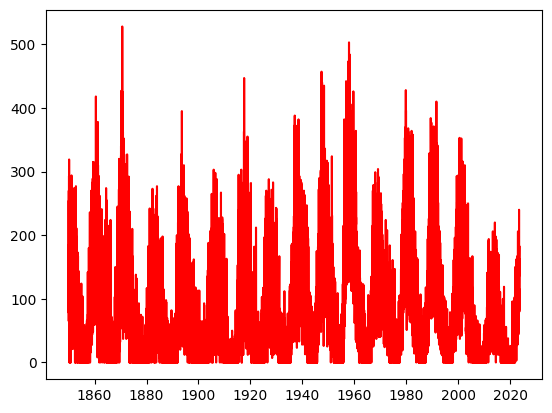

In [56]:
plt.plot(mydata['counts'], color ='red') #1

[ 87.69137447  87.68937371  87.68737294 ... -39.21092329 -39.21292405
 -39.21492481]


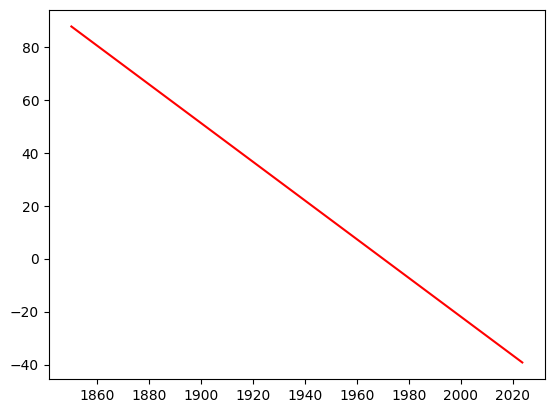

In [59]:
ypred = np.dot(matrix, optimal) # 2
print(ypred)
plt.plot(mydata.index ,ypred, color ='red')


##### Discussion       
As the data is showing clear seasonality it is not very useful to use linear model since it would not explain a lot. 

## Linear regression with more complicated models

Unless your measured quantity actually evolves linearly over time, you probably agree that by looking at your plot that there might be a model that better fits your data. 

**Task:** Look at your plot and describe which combined model of basic model components (i.e., linear trend, exponential divergence, exponential convergence, decaying oscillations, and sinusoidal oscillation with seasonal, annual, 24-hour "diurnal" periodicity, etc.) you think best fits your data. 

### Fitting a sinusoidal oscillation model

When our data includes a sinusoidal signal, it can be important to know that by linearly combining a sine and cosine function we can produce a sine function with a desired amplitude, $A$, and phase shift, $\phi$, but equal period, $\omega$,

$$
A \sin(\omega t + \phi) = \alpha _1 \sin(\omega t) + \alpha _2 \cos(\omega t).
$$

In other words, to fit a sine function to your data with this approach, you only have to manually define the period of the sine wave (i.e., in which time interval the signal completes a full circle, e.g., within one year, one day, etc.). Your matrix $\textbf{M}$ will then include the columns:

$$
    \textbf{M} = 
    \begin{pmatrix}
    \dots & \sin(\omega t_1) & \cos(\omega t_1)\\
    \dots & \sin(\omega t_2) & \cos(\omega t_2)\\
    \dots & \dots & \dots \\
    \end{pmatrix}.
$$

**Bonus Task:** Try to apply the process of fitting the linear model from the last section to a non-linear model, preferably one you think fits well. If your model includes a sinusoidal component, use a sine and cosine term instead of a single sine term. 

*Note: in case your row index is a DatetimeIndex, numpy does not know how to deal with it right away. However, you can convert it to a format numpy understands with `t = pd.to_timedelta(mydataframe.index - mydataframe.index[0]).total_seconds()`, which will give you the number of seconds since the first measurement. You can then choose to convert it to any other decimal time units by `t /= x` (e.g., `x = 60` for minutes, `x = 3600*24` for days).* 

In [ ]:
# it appears that my data shows clear seasonality with cycles equaling approx. 10 years.


## Uncertainty Analysis

### Confidence intervals on regression parameters

The first step in computing confidence intervals for the regression model parameters, $\alpha^\star$, you estimated earlier, is to calculate the *inverse* Fisher information matrix,

$$
\textbf{F}^{-1} = (\textbf{M}^T\textbf{M})^{-1} \sigma^2.
$$

**Task:** Calculate the inverse Fisher information matrix. If you did the bonus task and constructed multiple regression models, choose the one you think fits best. You can approximate the measurement noise covariance, $\sigma^2$, with the mismatch between your observed values, $\textbf{y}$, and your predicted values, $\textbf{y}_\text{pred}$ for our measured quantity: 
$
\sigma^2 \approx \text{cov}(\textbf{y} - \textbf{y}_\text{pred}).
$
Fortunately, numpy allows you to easily calculate a covariance matrix using the function [`np.cov`](https://numpy.org/doc/stable/reference/generated/numpy.cov.html).

In [69]:
residuals = mydata["counts"] - ypred
covariance_matrix = np.cov(residuals)
inverse_fisher_information = np.linalg.inv(matrix.T.dot(matrix)) * covariance_matrix
inverse_fisher_information

array([[1.68640367e-01, 4.90533696e-20],
       [4.90533696e-20, 4.68651065e-38]])

Now that you have $\textbf{F}^{-1}$ for your regression model you can use it to compute confidence intervals for your model's parameters. Confidence intervals depend on a choosen level of confidence, $\beta$. The higher this level, the wider the interval but the more certain we can be that the true parameter value, $\hat{\alpha}$, falls within the interval. There is no best choice for the confidence level but common values are $0.95$ or $0.99$.

The confidence interval for a model parameter is given by,

$$
\text{CI}(\alpha^\star_i) = \alpha^\star_i \pm \sqrt{\chi^2 \cdot (\textbf{F}^{-1})_{ii}}.
$$

Here, $\chi^2$, is the value from the density function of the chi-squared distribution that corresponds to your chosen confidence level and the degrees of freedom (DF) of your estimation. You can get this value either from a table like the one below or by using a function/method that gives you access to the $\chi^2$-density function. One such method is [`chi2.ppf`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html) from the `scipy` library (import with: `from scipy.stats import chi2`), e.g., `chi2.ppf(0.95, 1)` will return the value for a $95\%$ confidence interval at 1 degree of freedom.


| **confidence level $\beta$ =** | **0.75** | **0.90** | **0.95** | **0.975** | **0.990** | **0.995** |
|-----------|----------|----------|----------|-----------|-----------|-----------|
| DF = 1       | 1.323    |    2.706 |    3.841 |     5.024 |     6.635 |     7.879 |
| DF = 2       | 2.773    |    4.605 |    5.991 |     7.378 |     9.210 |    10.597 |
| DF = 3       | 4.108    |    6.251 |    7.815 |     9.348 |    11.345 |    12.838 |
| DF = 4       | 5.385    |    7.779 |    9.488 |    11.143 |    13.277 |    14.860 |

**Task:** Calculate the confidence intervals at a confidence level of your choice for your model parameters and interpret your results.

*Note: $(\textbf{F}^{-1})_{ii}$ is the entry of the inverse fisher information matrix at the i-th row and i-th column (i.e., the i-th value along its diagonal). You could write `myFmatrix[i,i]` to get the entry for each parameter. However, it might be more convenient to calculate the confidence intervals for all parameters at once by extracting the diagonal entries with [`np.diag`](https://numpy.org/doc/stable/reference/generated/numpy.diag.html)`(myFmatrix)`.*

In [73]:
from scipy.stats import chi2

confidence_level = 0.95
degrees_of_freedom = 1
chi_squared = chi2.ppf(confidence_level, degrees_of_freedom)
inverse_fisher_matrix = np.eye(len(optimal))  
confidence_intervals = []
for i in range(len(optimal)):
    parameter = optimal[i]
    fisher_entry = inverse_fisher_matrix[i, i]
    interval = parameter + np.sqrt(chi_squared * fisher_entry)
    confidence_intervals.append((parameter - interval, parameter + interval))
for i in range(len(optimal)):
    print(f"Parameter {i+1} confidence interval: {confidence_intervals[i]}")

Parameter 1 confidence interval: (-1.9599639845400538, 1.9599639845400538)
Parameter 2 confidence interval: (-1.9599639845400538, 1.9599639845400538)
